<a href="https://colab.research.google.com/github/james-monahan/Code-school-notebooks/blob/main/Week-10-ml-classification/Quest_Logistic_regression_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report

link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/titanic.csv"
df = pd.read_csv(link)
df['Survived'] = df['Survived'].apply(lambda x: "Survived" if x == 1 else "Dead")
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,Dead,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,Survived,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,Survived,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,Survived,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,Dead,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


# Data preparation

What are the "type" of each column? Are there non-numeric columns? 

In [ ]:
#object columns are non-numeric
print(df.dtypes)

Survived                    object
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object


As a reminder, the variables (X) of a machine learning model must be numerical. 
- For "Name", there's not much we can do. 
- For "Sex", you will transform the column values into numerical values.

In [ ]:
sexes = {'male': 0, 'female': 1}
df['Sex'] = df['Sex'].map(sexes)

survival = {'Dead': 0, 'Survived': 1}
df['Survived'] = df['Survived'].map(survival)

Then, make a first exploration (pairplots, correlation heatmaps, etc...) of the dataset

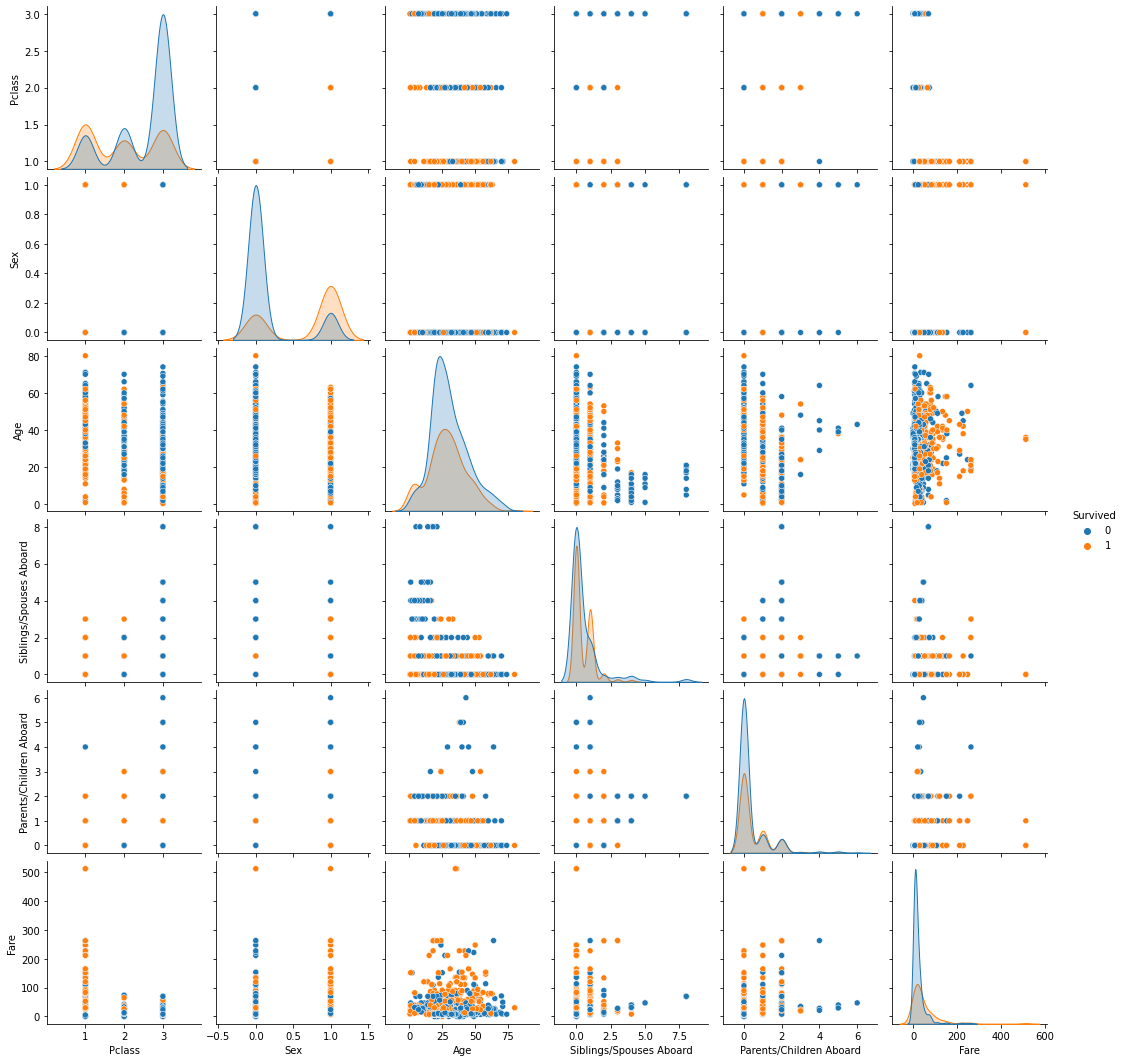

In [ ]:
sns.pairplot(df, hue='Survived')
plt.show()

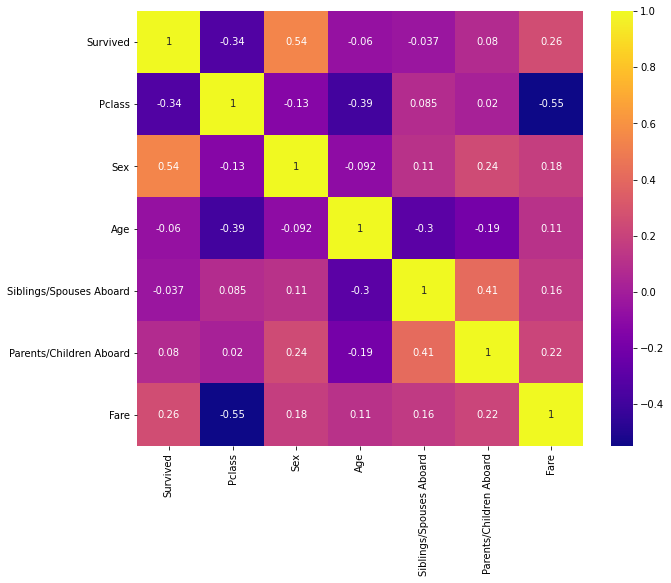

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap = "plasma", annot=True)

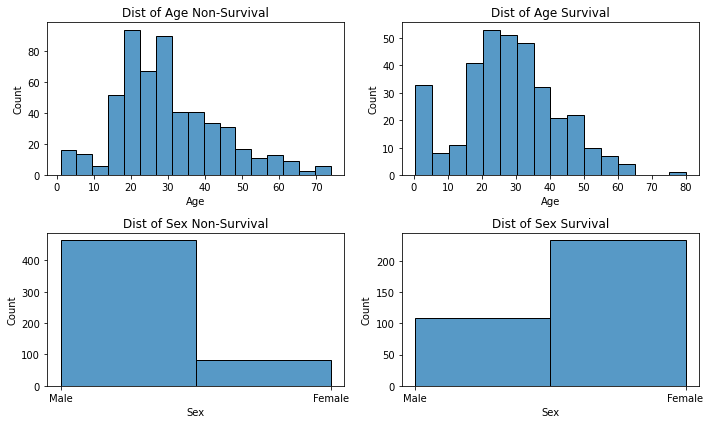

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,6))
sns.histplot(data=df.loc[df['Survived']==0], x='Age',ax=ax[0,0])
sns.histplot(data=df.loc[df['Survived']==1], x='Age', ax=ax[0,1])
sns.histplot(data=df.loc[df['Survived']==0], x='Sex',ax=ax[1,0], bins=2)
sns.histplot(data=df.loc[df['Survived']==1], x='Sex', ax=ax[1,1], bins=2)
ax[0,0].set_title("Dist of Age Non-Survival")
ax[0,1].set_title("Dist of Age Survival")
ax[1,0].set_title("Dist of Sex Non-Survival")
ax[1,1].set_title("Dist of Sex Survival")

plt.sca(ax[1, 1])
plt.xticks(range(2), ['Male', 'Female'])
plt.sca(ax[1, 0])
plt.xticks(range(2), ['Male', 'Female'])

plt.tight_layout()
plt.show()

You are looking for Jack. How many people named Jack on board?

In [ ]:
#Not who I'm looking for!!!!
(df['Name'].apply(lambda x: 'jack' in x.lower())).sum()
df.loc[df['Name'].apply(lambda x: 'jack' in x.lower())]

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
762,0,1,Dr. Arthur Jackson Brewe,0,46.0,0,0,39.6


# Logistic regression

Today, in this quest, you have an extraordinary power: you can travel in time to try to save certain passengers. 
You obviously wanted to save Jack. But you didn't find his name on the list. He probably travels under a false name...
Too bad, thanks to this trip, you will still try to save as many people as possible. To do this, you have to identify the people who are most probably going to die. 

- Select variables (X) with only numeric values, and without "Survived" column
- Select "Survived" column as target (y)
- Split your data with **random_state = 35**
- Train a logistic regression
- Print the accuracy score on the train set and on the test set. Is there overfitting?
- Print the Confusion Matrix on the test set
- How many iterations were needed to train this model?

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [ ]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

train data: 0.803030303030303
test data: 0.8122866894197952
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       180
           1       0.78      0.72      0.75       113

    accuracy                           0.81       293
   macro avg       0.80      0.79      0.80       293
weighted avg       0.81      0.81      0.81       293


Number of iterations [69]


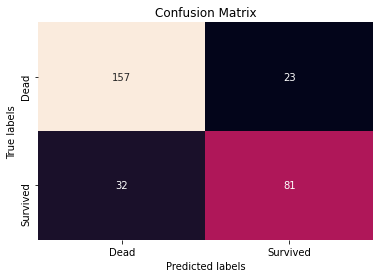

In [ ]:
X = df.drop(['Survived', 'Name'], axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=35, stratify=y)

LM = LogisticRegression()

model = LM.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("train data:",model.score(X_train, y_train))
print("test data:",model.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='d', cbar=False) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Dead', 'Survived']); ax.yaxis.set_ticklabels(['Dead', 'Survived'])

print(classification_report(y_test, y_pred))
print()
print("Number of iterations",model.n_iter_)

# Model improvement

You can save all the people that the model will predict as dead. Change the weight of the classes to save all the people at risk.
- Change the weight of the classes
- Fit the model on train set
- Print the accuracy score on the train set and on the test set
- Print the Confusion Matrix on the test set, you must have no deaths that have been predicted as "Survived".

train data: 0.42424242424242425
test data: 0.4334470989761092
              precision    recall  f1-score   support

           0       1.00      0.08      0.14       180
           1       0.41      1.00      0.58       113

    accuracy                           0.43       293
   macro avg       0.70      0.54      0.36       293
weighted avg       0.77      0.43      0.31       293


Number of iterations [74]


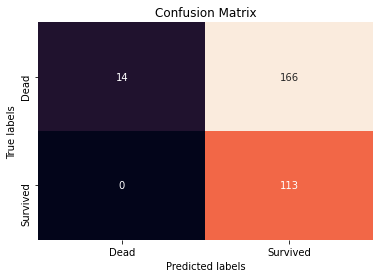

In [ ]:
X = df.drop(['Survived', 'Name'], axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=35, stratify=y)

LM = LogisticRegression(class_weight = {1 : 20})

model = LM.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("train data:",model.score(X_train, y_train))
print("test data:",model.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='d', cbar=False) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Dead', 'Survived']); ax.yaxis.set_ticklabels(['Dead', 'Survived'])

print(classification_report(y_test, y_pred))

print()
print("Number of iterations",model.n_iter_)

In [ ]:
#plot_confusion_matrix(model, X_test, y_test, values_format='d')

# Model improvement, under constraint

Tour time travel boss tells you that there's a budget cut. You now can only save 120 people max. 

Modify the weight of the classes to have only 120 people predicted as dead (whether they actually survived or not). 

train data: 0.7171717171717171
test data: 0.7133105802047781
              precision    recall  f1-score   support

           0       0.90      0.60      0.72       180
           1       0.58      0.89      0.71       113

    accuracy                           0.71       293
   macro avg       0.74      0.75      0.71       293
weighted avg       0.78      0.71      0.71       293



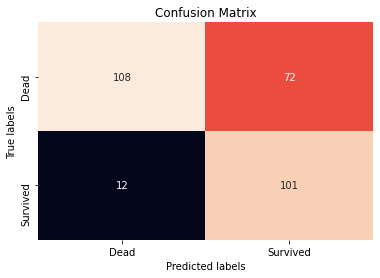

In [ ]:
X = df.drop(['Survived', 'Name'], axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=35, stratify=y)

LM = LogisticRegression(class_weight = {1 : 2, 0 : .48})

model = LM.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("train data:",model.score(X_train, y_train))
print("test data:",model.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='d', cbar=False) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Dead', 'Survived']); ax.yaxis.set_ticklabels(['Dead', 'Survived'])

print(classification_report(y_test, y_pred))

# People least at risk

You are looking for people most at risk.
- Compute the matrix of prediction probabilities **on your test set**
- Print the list of classes
- Among the previous prediction probability matrix, select only the column corresponding to the "Survived" probability
- Add this "Survived" column in X_test
- Display this X_test DataFrame by sorting the passengers most likely to survive first (`sorted_values()`method ?)

In [ ]:
X = df.drop(['Survived', 'Name'], axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=35, stratify=y)
LM = LogisticRegression()
model = LM.fit(X_train, y_train)
y_pred = model.predict(X_test)

pred_probs = model.predict_proba(X_test)
#print(y_pred)
pred_probs = pred_probs[:, 1]
X_test['survived'] = pred_probs
X_test.sort_values('survived', ascending=False).head(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,survived
257,1,1,35.0,0,0,512.3292,0.991942
686,1,1,15.0,0,1,211.3375,0.982850
309,1,1,18.0,2,2,262.3750,0.966527
305,1,1,17.0,1,0,108.9000,0.960265
849,1,1,16.0,0,1,39.4000,0.957459


In [ ]:
#Print the list of classes
class_probs = zip(y_pred, pred_probs)
[*class_probs][:10]

[(1, 0.61939084627086),
 (0, 0.3547537033469916),
 (1, 0.5426777523268708),
 (0, 0.04627488724943725),
 (0, 0.1608806778471462),
 (1, 0.9034495744141143),
 (1, 0.8071319778506851),
 (1, 0.6996192064050397),
 (1, 0.9533350519718925),
 (1, 0.6633628407166374)]

# More predictions

Does the Reverend "Rev. Juozas Montvila" have a better chance of survival than "Mrs. William (Margaret Norton) Rice"?
- Filter the initial DataFrame to get only the 2 rows with the 2 persons above, and only columns present in your variables (X)
- Make a prediction with probability for this 2 people
- Which one has a better chance to survive?


In [ ]:
names = (df['Name'] == "Rev. Juozas Montvila") | (df['Name'] == "Mrs. William (Margaret Norton) Rice") 
print(df[names])
X_names_named = df[names]
X_names = df[names].drop(['Survived', 'Name'], axis=1)

     Survived  Pclass  ... Parents/Children Aboard    Fare
881         0       3  ...                       5  29.125
882         0       2  ...                       0  13.000

[2 rows x 8 columns]


In [ ]:
competition = model.predict_proba(X_names)
competition = competition[:, 1]

X_names['prob'] = competition

In [ ]:
#Mrs. William (Margaret Norton) Rice
X_names

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,prob
881,3,1,39.0,0,5,29.125,0.369201
882,2,0,27.0,0,0,13.000,0.287956
